In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read files
air_reserve = pd.read_csv("./data/air_reserve.csv", parse_dates=['visit_datetime', 'reserve_datetime'])
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [3]:
hpg_reserve = pd.read_csv("./data/hpg_reserve.csv", parse_dates=['visit_datetime', 'reserve_datetime'])
hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [4]:
air_hpg_mapping =  pd.read_csv("./data/store_id_relation.csv")
air_hpg_mapping.head()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


In [5]:
air_info = pd.read_csv("./data/air_store_info.csv")
air_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [6]:
hpg_info = pd.read_csv("./data/hpg_store_info.csv")
hpg_info.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


In [7]:
visit_data = pd.read_csv("./data/air_visit_data.csv", parse_dates=['visit_date'])
visit_data['visit_date'] = visit_data.visit_date.astype(str)
visit_data.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [8]:
visit_data_dict = visit_data.set_index(['air_store_id', 'visit_date'])['visitors'].to_dict()
visit_data_dict

{('air_ba937bf13d40fb24', '2016-01-13'): 25,
 ('air_ba937bf13d40fb24', '2016-01-14'): 32,
 ('air_ba937bf13d40fb24', '2016-01-15'): 29,
 ('air_ba937bf13d40fb24', '2016-01-16'): 22,
 ('air_ba937bf13d40fb24', '2016-01-18'): 6,
 ('air_ba937bf13d40fb24', '2016-01-19'): 9,
 ('air_ba937bf13d40fb24', '2016-01-20'): 31,
 ('air_ba937bf13d40fb24', '2016-01-21'): 21,
 ('air_ba937bf13d40fb24', '2016-01-22'): 18,
 ('air_ba937bf13d40fb24', '2016-01-23'): 26,
 ('air_ba937bf13d40fb24', '2016-01-25'): 21,
 ('air_ba937bf13d40fb24', '2016-01-26'): 11,
 ('air_ba937bf13d40fb24', '2016-01-27'): 24,
 ('air_ba937bf13d40fb24', '2016-01-28'): 21,
 ('air_ba937bf13d40fb24', '2016-01-29'): 26,
 ('air_ba937bf13d40fb24', '2016-01-30'): 6,
 ('air_ba937bf13d40fb24', '2016-02-03'): 18,
 ('air_ba937bf13d40fb24', '2016-02-04'): 12,
 ('air_ba937bf13d40fb24', '2016-02-05'): 45,
 ('air_ba937bf13d40fb24', '2016-02-06'): 15,
 ('air_ba937bf13d40fb24', '2016-02-08'): 19,
 ('air_ba937bf13d40fb24', '2016-02-09'): 15,
 ('air_ba937b

In [9]:
submission_data = pd.read_csv("./data/sample_submission.csv")
submission_data.head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


In [10]:
submission_data['air_store_id'] = submission_data.id.apply(lambda x: '_'.join(x.split('_')[:-1]))
submission_data['visit_date'] = pd.to_datetime(submission_data.id.apply(lambda x: x.split('_')[-1]))
submission_data.head()

,id,visitors,air_store_id,visit_date
0,air_00a91d42b08b08d9_2017-04-23,0,air_00a91d42b08b08d9,2017-04-23
1,air_00a91d42b08b08d9_2017-04-24,0,air_00a91d42b08b08d9,2017-04-24
2,air_00a91d42b08b08d9_2017-04-25,0,air_00a91d42b08b08d9,2017-04-25
3,air_00a91d42b08b08d9_2017-04-26,0,air_00a91d42b08b08d9,2017-04-26
4,air_00a91d42b08b08d9_2017-04-27,0,air_00a91d42b08b08d9,2017-04-27


In [11]:
holiday_data = pd.read_csv("./data/date_info.csv",parse_dates=['calendar_date'])
holiday_data.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [12]:
#First check whether all air store ids in test are in train data
test_air_ids = submission_data.air_store_id.unique()
train_air_ids = visit_data.air_store_id.unique()

print(len(test_air_ids),len(train_air_ids))

821 829


In [13]:
set(train_air_ids) - set(test_air_ids)

{'air_0ead98dd07e7a82a',
 'air_229d7e508d9f1b5e',
 'air_2703dcb33192b181',
 'air_b2d8bc9c88b85f96',
 'air_cb083b4789a8d3a2',
 'air_cf22e368c1a71d53',
 'air_d0a7bd3339c3d12a',
 'air_d63cfa6d6ab78446'}

In [14]:
#So , we need to do prediction for only test air store ids

#We map immediate attributes to each one of those and save the big dataframe

In [15]:
#Step 1: Numerically encode test air store ids and save
air_id_dict = dict([(*zip(test_air_ids, np.arange(len(test_air_ids))))])
air_id_reverse_dict = dict([*zip(air_id_dict.values(), air_id_dict.keys())])

In [16]:
#Step 2: Initialize train data with store ids
train_data = pd.DataFrame({'air_store_id': test_air_ids})
train_data.head()

,air_store_id
0,air_00a91d42b08b08d9
1,air_0164b9927d20bcc3
2,air_0241aa3964b7f861
3,air_0328696196e46f18
4,air_034a3d5b40d5b1b1


In [17]:
#Step 3: Get date columns and map visitors for each data in training data
#Train dates start from 2016-01-01 and end at 2017-04-22 (reserve)
date_cols = pd.date_range(start='2016-01-01', end='2017-04-22').date.astype(str)

for col in date_cols:
    train_data[col] = train_data.air_store_id.apply(lambda x: visit_data_dict[(x, col)] 
                                                    if (x, col) in visit_data_dict.keys()
                                                    else -1).astype(np.int32)
train_data.head()

,air_store_id,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,...,2017-04-13,2017-04-14,2017-04-15,2017-04-16,2017-04-17,2017-04-18,2017-04-19,2017-04-20,2017-04-21,2017-04-22
0,air_00a91d42b08b08d9,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,34,39,-1,-1,19,35,17,38,55,18
1,air_0164b9927d20bcc3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,13,7,1,-1,2,1,8,1,26,6
2,air_0241aa3964b7f861,-1,-1,10,9,17,10,-1,5,8,...,-1,4,15,10,12,19,8,-1,3,13
3,air_0328696196e46f18,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,9,4,3,3,-1,24,-1,19,8
4,air_034a3d5b40d5b1b1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,22,18,31,39,25,20,31,12,37,35


In [18]:
train_data = pd.merge(train_data, air_info, on='air_store_id', how='left')
train_data.shape

(821, 483)

In [19]:
train_data.head()

,air_store_id,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,...,2017-04-17,2017-04-18,2017-04-19,2017-04-20,2017-04-21,2017-04-22,air_genre_name,air_area_name,latitude,longitude
0,air_00a91d42b08b08d9,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,19,35,17,38,55,18,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
1,air_0164b9927d20bcc3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,2,1,8,1,26,6,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
2,air_0241aa3964b7f861,-1,-1,10,9,17,10,-1,5,8,...,12,19,8,-1,3,13,Izakaya,Tōkyō-to Taitō-ku Higashiueno,35.712607,139.779996
3,air_0328696196e46f18,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,3,-1,24,-1,19,8,Dining bar,Ōsaka-fu Ōsaka-shi Nakanochō,34.701279,135.528090
4,air_034a3d5b40d5b1b1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,25,20,31,12,37,35,Cafe/Sweets,Ōsaka-fu Ōsaka-shi Ōhiraki,34.692337,135.472229


In [20]:
train_data.air_area_name.nunique(),train_data.air_genre_name.nunique()

(103, 14)

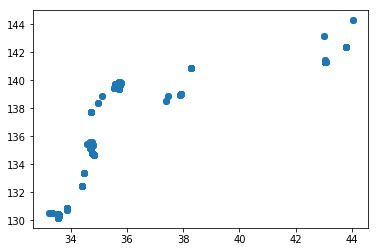

In [21]:
plt.scatter(train_data.latitude, train_data.longitude)
plt.show()

In [22]:
train_data.latitude.nunique(), train_data.longitude.nunique()

(108, 108)

In [23]:
air_reserve.tail()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
92373,air_db4b38ebe7a7ceff,2017-05-29 18:00:00,2017-04-17 19:00:00,6
92374,air_1033310359ceeac1,2017-05-30 23:00:00,2017-04-19 17:00:00,8
92375,air_877f79706adbfb06,2017-05-31 20:00:00,2017-04-12 23:00:00,3
92376,air_900d755ebd2f7bbd,2017-05-31 20:00:00,2017-04-19 16:00:00,10
92377,air_3cad29d1a23209d2,2017-05-31 21:00:00,2017-04-22 10:00:00,3


In [24]:
len(pd.date_range("2017-04-23", "2017-05-31")) #visit datetime

39

In [25]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
train_data['air_genre_name'] = lb.fit_transform(train_data['air_genre_name'])
train_data['air_area_name']  = lb.fit_transform(train_data['air_area_name'])

In [26]:
train_data.head()

,air_store_id,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,...,2017-04-17,2017-04-18,2017-04-19,2017-04-20,2017-04-21,2017-04-22,air_genre_name,air_area_name,latitude,longitude
0,air_00a91d42b08b08d9,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,19,35,17,38,55,18,6,44,35.694003,139.753595
1,air_0164b9927d20bcc3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,2,1,8,1,26,6,6,62,35.658068,139.751599
2,air_0241aa3964b7f861,-1,-1,10,9,17,10,-1,5,8,...,12,19,8,-1,3,13,7,82,35.712607,139.779996
3,air_0328696196e46f18,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,3,-1,24,-1,19,8,4,98,34.701279,135.528090
4,air_034a3d5b40d5b1b1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,25,20,31,12,37,35,2,102,34.692337,135.472229


In [27]:
train_data.to_pickle("./data/train_data.pkl")